In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PowerCut Data.csv")
print(df.shape)
df.head()

(9756, 13)


,MONTH,TYPE,CIRCLE,DIVISION,SUB_DIVISION,SAMPLE,POWEROFF_PREV,KWH_PREV,ESO_PREV,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE
0,202402,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),NaN,667,15.90,"4,05,181","9,171",16.57,"3,75,148","7,553",4.21%
1,202402,WC,DWK,2661,NaN,"2,662",3.87,"22,23,427","14,462",2.00,"23,93,594","8,334",-48.32%
2,202402,WC,JKP,2610,NaN,"8,241",3.05,"65,37,234","30,160",2.24,"69,55,959","22,258",-26.56%
3,202402,WC,"KHP, SVR, NFC",2511,NaN,704,3.41,"11,18,536","5,637",4.21,"11,74,879","7,763",23.46%
4,202402,WC,"KHP, SVR, NFC",2541,NaN,791,5.46,"12,37,871","10,682",3.78,"12,85,470","6,709",-30.77%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTH          9756 non-null   int64  
 1   TYPE           9756 non-null   object 
 2   CIRCLE         9684 non-null   object 
 3   DIVISION       8400 non-null   object 
 4   SUB_DIVISION   6528 non-null   object 
 5   SAMPLE         9756 non-null   object 
 6   POWEROFF_PREV  9756 non-null   float64
 7   KWH_PREV       9756 non-null   object 
 8   ESO_PREV       9756 non-null   object 
 9   POWEROFF_CURR  9756 non-null   float64
 10  KWH_CURR       9756 non-null   object 
 11  ESO_CURR       9756 non-null   object 
 12  PER_CHANGE     9756 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 991.0+ KB


In [4]:
df.isnull().sum()

MONTH               0
TYPE                0
CIRCLE             72
DIVISION         1356
SUB_DIVISION     3228
SAMPLE              0
POWEROFF_PREV       0
KWH_PREV            0
ESO_PREV            0
POWEROFF_CURR       0
KWH_CURR            0
ESO_CURR            0
PER_CHANGE          0
dtype: int64

In [5]:
df.describe()

,MONTH,POWEROFF_PREV,POWEROFF_CURR
count,9756.000000,9756.000000,9756.000000
mean,202381.561501,6.181121,5.725043
std,64.516196,6.410511,5.404626
min,202304.000000,0.060000,0.130000
25%,202310.000000,2.320000,2.230000
50%,202404.000000,3.895000,3.750000
75%,202410.000000,7.440000,7.210000
max,202503.000000,75.780000,55.370000


### Cleaning the data

In [6]:
# ➡️ Cleans the 'SAMPLE' column by removing commas and extra spaces from strings.
df['SAMPLE'] = df['SAMPLE'].str.replace(',', '').str.strip()
df.head()

,MONTH,TYPE,CIRCLE,DIVISION,SUB_DIVISION,SAMPLE,POWEROFF_PREV,KWH_PREV,ESO_PREV,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE
0,202402,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),NaN,667,15.90,"4,05,181","9,171",16.57,"3,75,148","7,553",4.21%
1,202402,WC,DWK,2661,NaN,2662,3.87,"22,23,427","14,462",2.00,"23,93,594","8,334",-48.32%
2,202402,WC,JKP,2610,NaN,8241,3.05,"65,37,234","30,160",2.24,"69,55,959","22,258",-26.56%
3,202402,WC,"KHP, SVR, NFC",2511,NaN,704,3.41,"11,18,536","5,637",4.21,"11,74,879","7,763",23.46%
4,202402,WC,"KHP, SVR, NFC",2541,NaN,791,5.46,"12,37,871","10,682",3.78,"12,85,470","6,709",-30.77%


In [7]:
# Fill missing values by SAMPLE (forward and backward)
df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())
df['SUB_DIVISION'] = df.groupby('SAMPLE')['SUB_DIVISION'].transform(lambda x: x.ffill().bfill())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\716469632.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\716469632.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SUB_DIVISION'] = df.groupby('SAMPLE')['SUB_DIVISION'].transform(lambda x: x.ffill().bfill())


In [8]:
df['DIVISION'] = df.groupby(['CIRCLE', 'TYPE', 'MONTH'])['DIVISION'].transform(lambda x: x.ffill().bfill())
df['SUB_DIVISION'] = df.groupby(['DIVISION', 'TYPE', 'MONTH'])['SUB_DIVISION'].transform(lambda x: x.ffill().bfill())

In [9]:
df.isnull().sum()

MONTH             0
TYPE              0
CIRCLE           72
DIVISION         72
SUB_DIVISION     72
SAMPLE            0
POWEROFF_PREV     0
KWH_PREV          0
ESO_PREV          0
POWEROFF_CURR     0
KWH_CURR          0
ESO_CURR          0
PER_CHANGE        0
dtype: int64

### Lent's check the value we filled is this is logical or wrong filling

In [10]:
df.groupby('SAMPLE')[['DIVISION', 'SUB_DIVISION']].nunique().sort_values(by='DIVISION', ascending=False)

,DIVISION,SUB_DIVISION
SAMPLE,,
115,10,9
55,10,9
56,9,10
52,9,9
121,8,8
...,...,...
1724342,0,0
1697134,0,0
1668547,0,0


In [11]:
filled_rows = df[df['DIVISION'].notnull()]
null_rows = df[df['DIVISION'].isnull()]


print(filled_rows['POWEROFF_CURR'].describe())
print()
print(null_rows['POWEROFF_CURR'].describe())
# We check whether rows with missing 'DIVISION' have different behavior (e.g., unusually high/low power cuts). 
# Through this we have a clarity that should we keep the rows or not

count    9684.000000
mean        5.733625
std         5.422315
min         0.130000
25%         2.220000
50%         3.730000
75%         7.260000
max        55.370000
Name: POWEROFF_CURR, dtype: float64

count    72.000000
mean      4.570833
std       1.463140
min       1.940000
25%       3.550000
50%       4.375000
75%       5.412500
max       9.810000
Name: POWEROFF_CURR, dtype: float64


In [12]:
df['DIVISION_WAS_FILLED'] = df['DIVISION'].isnull()
df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())
df['DIVISION_WAS_FILLED'] = df['DIVISION_WAS_FILLED'] & df['DIVISION'].notnull()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\575509116.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DIVISION'] = df.groupby('SAMPLE')['DIVISION'].transform(lambda x: x.ffill().bfill())


In [13]:
df[df['DIVISION_WAS_FILLED']].head()

,MONTH,TYPE,CIRCLE,DIVISION,SUB_DIVISION,SAMPLE,POWEROFF_PREV,KWH_PREV,ESO_PREV,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE,DIVISION_WAS_FILLED
5379,202411,LT,NaN,2610,NaN,8783,2.75,"5,22,55,529","2,30,159",2.74,"5,47,99,586","2,39,284",-.36%,True
6389,202409,LT,NaN,2610,NaN,8787,4.26,"7,55,78,781","4,68,480",5.54,"7,27,77,830","6,07,606",30.05%,True


In [14]:
df.dropna()
df = df[df['DIVISION'].notnull()]
df = df.dropna(subset=['CIRCLE'])

#### Drop Unuse Columns

In [15]:
df.drop(columns=['SAMPLE', 'DIVISION_WAS_FILLED', 'KWH_PREV', 'ESO_PREV', 'POWEROFF_PREV', 'SUB_DIVISION'], inplace=True)
print(df.shape)
df.head()

(9684, 8)


,MONTH,TYPE,CIRCLE,DIVISION,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE
0,202402,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),16.57,"3,75,148","7,553",4.21%
1,202402,WC,DWK,2661,2.00,"23,93,594","8,334",-48.32%
2,202402,WC,JKP,2610,2.24,"69,55,959","22,258",-26.56%
3,202402,WC,"KHP, SVR, NFC",2511,4.21,"11,74,879","7,763",23.46%
4,202402,WC,"KHP, SVR, NFC",2541,3.78,"12,85,470","6,709",-30.77%


In [16]:
# Convert Data type
df['MONTH'] = pd.to_datetime(df['MONTH'].astype(str), format='%Y%m')
# -----------------------------------------------------------------------
cols_to_clean = ['KWH_CURR', 'ESO_CURR']
for col in cols_to_clean:
    df[col] = df[col].str.replace(',', '', regex=True).astype(float)
# -------------------------------------------------------------------------
df['PER_CHANGE'] = df['PER_CHANGE'].str.replace('%', '', regex=False).astype(float)
# --------------------------------------------------------------------------

<h3 style = "color:yellow">1) How has the average power cut duration changed over time (monthly trend)?</h3>

In [17]:
monthly_avg = df.groupby(df['MONTH'])['POWEROFF_CURR'].mean()
monthly_avg

MONTH
2023-04-01    5.272407
2023-05-01    7.543697
2023-06-01    5.982407
2023-07-01    5.998561
2023-08-01    5.839628
2023-09-01    5.565484
2023-10-01    4.825856
2023-11-01    3.758809
2023-12-01    5.172705
2024-01-01    5.584789
2024-02-01    5.362779
2024-03-01    5.210447
2024-04-01    5.235792
2024-05-01    8.102228
2024-06-01    9.126064
2024-07-01    6.799406
2024-08-01    7.344604
2024-09-01    6.393465
2024-10-01    4.817970
2024-11-01    3.737921
2024-12-01    5.919777
2025-01-01    5.577550
2025-02-01    3.252500
2025-03-01    5.175495
Name: POWEROFF_CURR, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\3186836027.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


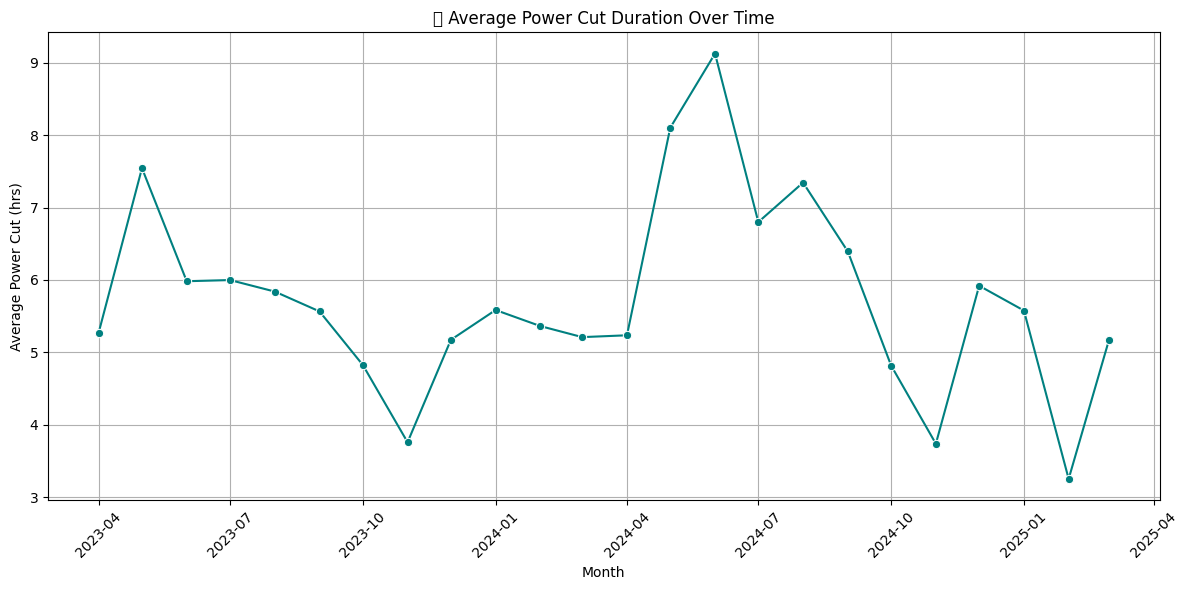

In [18]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, marker='o', color='teal')
plt.title('📉 Average Power Cut Duration Over Time')
plt.xlabel('Month')
plt.ylabel('Average Power Cut (hrs)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Monthly Trend of Average Power Cut Duration
The line plot reveals a clear seasonal pattern in power cut durations, with notable peaks and dips:

#### 🔥 Peak Months (Longest Outages)
- May-June 2024 saw the highest disruptions, averaging 8.1–9.1 hours.
- May 2023 also recorded a high (7.5 hours), suggesting recurring summer challenges.
- August 2024 followed closely (7.3 hours), indicating potential monsoon-related issues.

#### ❄️ Lowest Months (Minimal Outages)
- November 2023: 3.76 hours
- November 2024: 3.74 hours
- February 2025: 3.25 hours (📉 Lowest average)
 <br> 
likely due to stable weather and lower demand.

#### 📊 Baseline Trend
- Most months hovered between 4.8–6.7 hours, reflecting moderate but consistent power reliability.

Recommendation: Investigate summer/monsoon infrastructure resilience to reduce peak-month outages.

<h3 style = "color:yellow">2) Which months had the highest and lowest power cuts?</h3>

In [19]:
# Group by month and sum the total power cuts
highest_lowest_powerCut = df.groupby(df['MONTH'])['POWEROFF_CURR'].sum()
# Convert Series to DataFrame for plotting
highest_lowest_powerCut_df = highest_lowest_powerCut.reset_index()
highest_lowest_powerCut_df.columns = ['MONTH', 'POWERCUT']
highest_lowest_powerCut

MONTH
2023-04-01    2124.78
2023-05-01    3040.11
2023-06-01    2410.91
2023-07-01    2417.42
2023-08-01    2353.37
2023-09-01    2242.89
2023-10-01    1944.82
2023-11-01    1514.80
2023-12-01    2084.60
2024-01-01    2250.67
2024-02-01    2161.20
2024-03-01    2099.81
2024-04-01    2115.26
2024-05-01    3273.30
2024-06-01    3686.93
2024-07-01    2746.96
2024-08-01    2967.22
2024-09-01    2582.96
2024-10-01    1946.46
2024-11-01    1510.12
2024-12-01    2391.59
2025-01-01    2253.33
2025-02-01    1314.01
2025-03-01    2090.90
Name: POWEROFF_CURR, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\1741270480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_lowest_powerCut_df, x='MONTH', y='POWERCUT', palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\1741270480.py:7: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


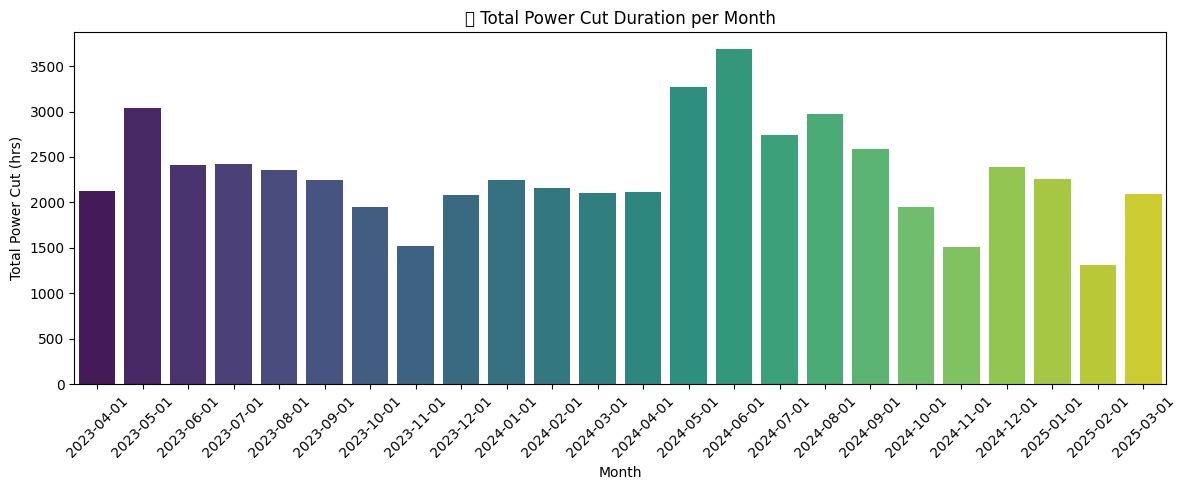

In [20]:
plt.figure(figsize=(12, 5))
sns.barplot(data=highest_lowest_powerCut_df, x='MONTH', y='POWERCUT', palette="viridis")
plt.xticks(rotation=45)
plt.title("🔌 Total Power Cut Duration per Month")
plt.ylabel("Total Power Cut (hrs)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### 🔍 Insight: Total Power Cut per Month
The total power cut durations across months reveal significant variation:

#### 🚨 Highest Power Cut:
     June 2024 – 3686.93 hours

#### ✅ Lowest Power Cut: 
     February 2025 – 1314.01 hours

##### 🧠 Reasoning:
The spike in June likely aligns with peak summer demand, causing overloads or scheduled outages, while February typically sees lower energy consumption, resulting in fewer disruptions.

<h3 style = "color:yellow">3) Is there a seasonal pattern in power cuts (e.g., summer vs winter)?</h3>

In [21]:
def get_season(month):
    if month in [3,4,5,6]:
        return 'Summer'
    elif month in [7,8,9]:
        return 'Monsoon'
    elif month in [10,11]:
        return 'Autumn'
    else:
        return 'Winter'

In [22]:
df['SEASON'] = df['MONTH'].dt.month.apply(get_season)
df

,MONTH,TYPE,CIRCLE,DIVISION,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE,SEASON
0,2024-02-01,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),16.57,375148.0,7553.0,4.21,Winter
1,2024-02-01,WC,DWK,2661,2.00,2393594.0,8334.0,-48.32,Winter
2,2024-02-01,WC,JKP,2610,2.24,6955959.0,22258.0,-26.56,Winter
3,2024-02-01,WC,"KHP, SVR, NFC",2511,4.21,1174879.0,7763.0,23.46,Winter
4,2024-02-01,WC,"KHP, SVR, NFC",2541,3.78,1285470.0,6709.0,-30.77,Winter
...,...,...,...,...,...,...,...,...,...
9751,2024-08-01,1PH,"KHP, SVR, NFC",2542,4.45,4490821.0,25601.0,10.42,Monsoon
9752,2024-08-01,1PH,"KHP, SVR, NFC",2542,4.27,13539078.0,76342.0,-24.96,Monsoon
9753,2024-08-01,1PH,MGN,2652,11.18,7279231.0,116017.0,8.33,Monsoon
9754,2024-08-01,1PH,MGN,2652,10.28,9510878.0,129906.0,68.25,Monsoon


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\2454684667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_avg, x='SEASON', y='POWEROFF_CURR', palette='magma')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\2454684667.py:7: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


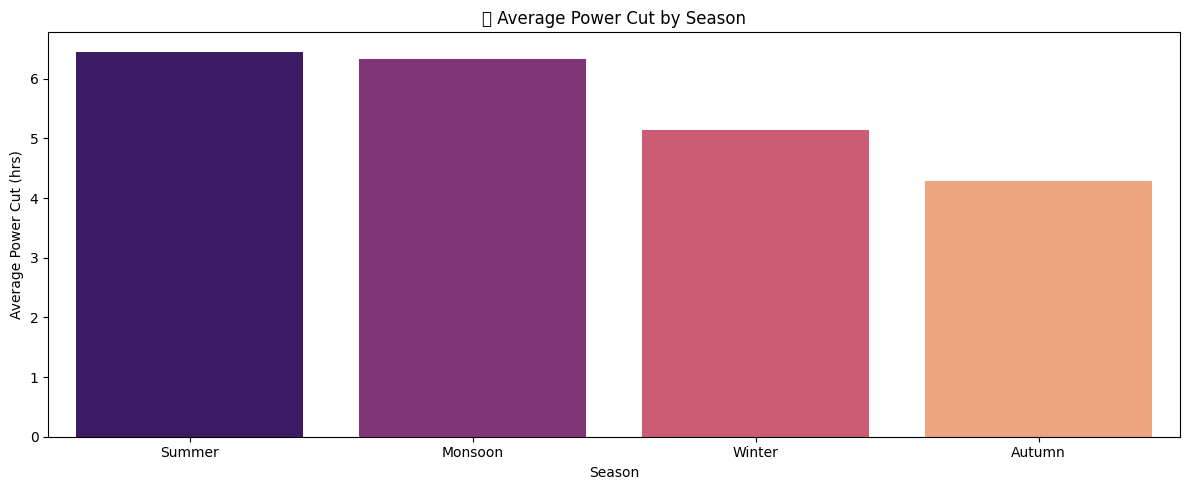

In [23]:
seasonal_avg = df.groupby('SEASON')['POWEROFF_CURR'].mean().reset_index().sort_values(by='POWEROFF_CURR', ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(data=seasonal_avg, x='SEASON', y='POWEROFF_CURR', palette='magma')
plt.title('🌦️ Average Power Cut by Season')
plt.xlabel('Season')
plt.ylabel('Average Power Cut (hrs)')
plt.tight_layout()
plt.show()

### 🌤️ Insight: Seasonal Trends in Power Cuts
- 🔥 Summer recorded the highest average power cuts (6.45 hrs) — likely due to increased demand for cooling appliances, causing grid stress and overloads.

- 🌧️ Monsoon followed closely (6.32 hrs), possibly impacted by technical issues such as waterlogging, equipment faults, and storm damage.

- ❄️ Winter and 🍂 Autumn experienced fewer outages (5.14 hrs and 4.28 hrs respectively), indicating lower stress on infrastructure during these seasons.

#### 🧠 Conclusion: A clear seasonal pattern exists — power cuts peak in high-demand or high-disruption periods (summer/monsoon) and decline in stable weather months.



<h3 style = "color:yellow">4) Which CIRCLE experiences the highest average power cuts?</h3>

In [24]:
df['CIRCLE'].value_counts()

CIRCLE
CWL, NJF, JFP, MITRAON    1296
KHP, SVR, NFC             1080
RKP, HKS                   720
TGN, MDK                   648
VKJ                        648
NZM                        504
JKP                        504
DWK                        432
PLM                        432
NGL                        432
ALN                        432
SKT                        420
NHP                        360
PJB                        360
VKP                        360
UTN                        360
CHP                        360
MGN                        336
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\1980963845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Circle_powercut, x='CIRCLE', y='POWEROFF_CURR', palette='icefire')


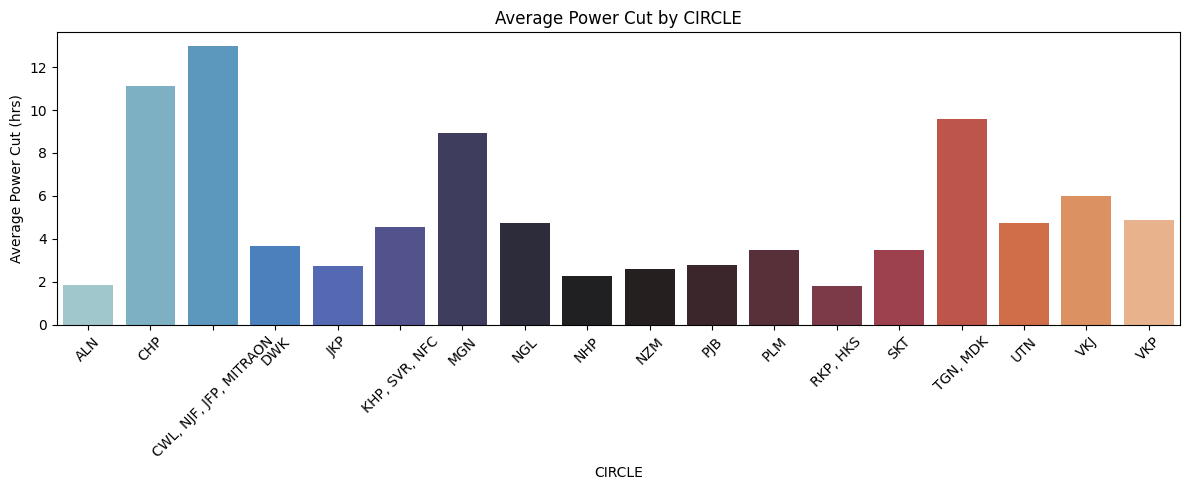

In [25]:
Circle_powercut = df.groupby(df['CIRCLE']) ['POWEROFF_CURR'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=Circle_powercut, x='CIRCLE', y='POWEROFF_CURR', palette='icefire')
plt.title('Average Power Cut by CIRCLE')
plt.xlabel('CIRCLE')
plt.ylabel('Average Power Cut (hrs)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 🏙️ Insight: CIRCLE-wise Average Power Cut Analysis
- 📍 The CIRCLE "CWL, NJF, JFP, MITRAON" faced the highest average power cuts — 12.97 hrs, indicating major reliability issues or supply challenges in this area.
- Other high-cut regions include:

>- CHP – 11.12 hrs
>- TGN, MDK – 9.59 hrs
>- MGN – 8.94 hrs

- In contrast, RKP, HKS and ALN experienced the lowest outages with just ~1.8 hrs.

#### 🚨 Observation: The wide variance suggests that certain circles may be suffering from infrastructure gaps, while others are better managed or upgraded.



<h3 style = "color:yellow">5) Which DIVISION has shown improvement or decline in power cuts (PER_CHANGE)?</h3>

In [26]:
division_change = df.groupby('DIVISION')['PER_CHANGE'].mean().reset_index()
# Sort to see most improved and most worsened
division_change_sorted = division_change.sort_values(by='PER_CHANGE')

# Most improved (largest negative change)
most_improved = division_change_sorted.head()

# Most worsened (largest positive change)
most_declined = division_change_sorted.tail()

print("Most Improved Divisions:\n", most_improved)
print("\nMost Declined Divisions:\n", most_declined)

Most Improved Divisions:
           DIVISION  PER_CHANGE
3     2520 - ( R )  -31.360704
10            2541  -10.283566
17  2621 - ( JFP )   -9.694475
4     2520 - ( U )   -6.077800
16  2620 - ( NJF )   -5.215223

Most Declined Divisions:
    DIVISION  PER_CHANGE
1      2511   16.357705
13     2551   18.169584
25     2652   18.632704
2      2520   22.084965
24     2651   30.320000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\2479111232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=division_change_sorted, x='DIVISION', y='PER_CHANGE', palette='flare')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\2479111232.py:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


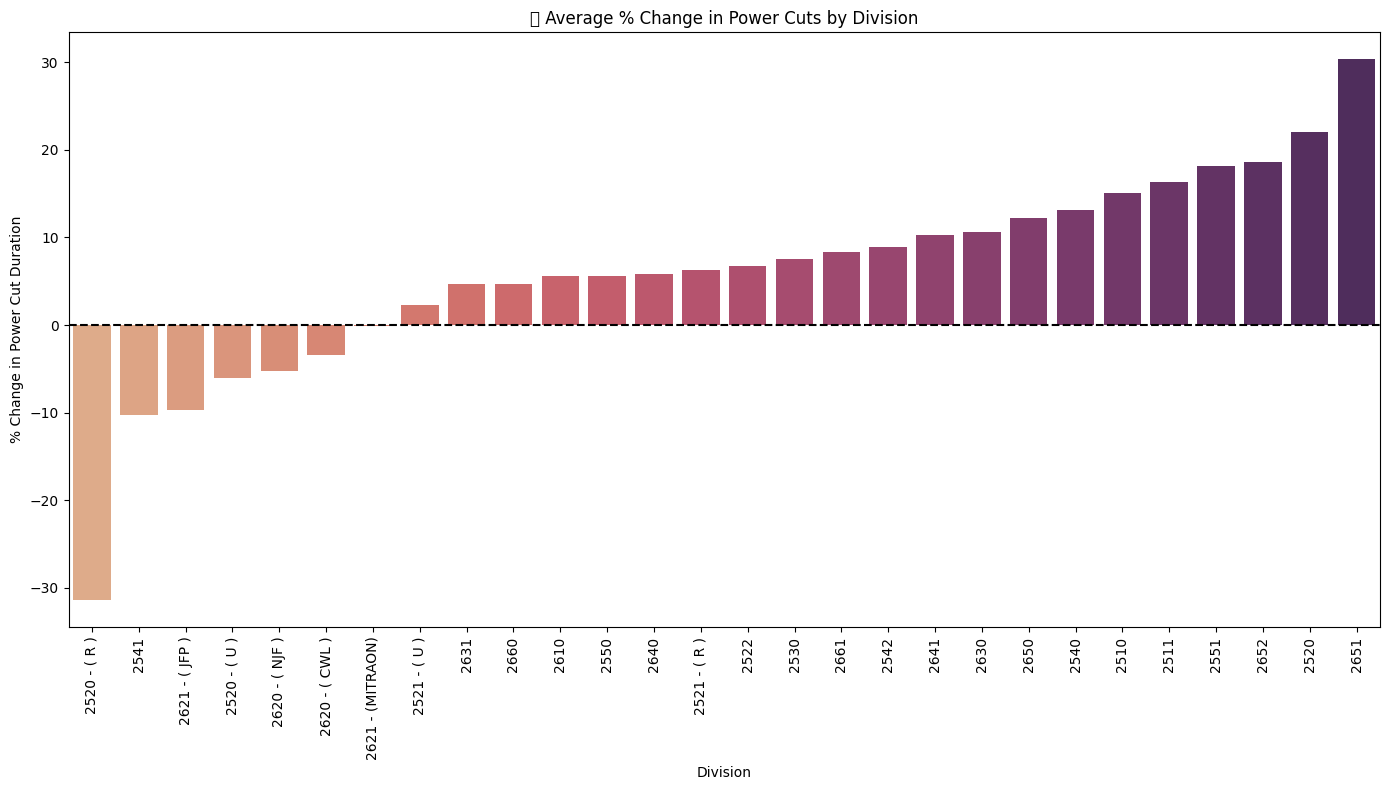

In [27]:
plt.figure(figsize=(14, 8))
sns.barplot(data=division_change_sorted, x='DIVISION', y='PER_CHANGE', palette='flare')
plt.axhline(0, color='black', linestyle='--')
plt.title('📉 Average % Change in Power Cuts by Division')
plt.ylabel('% Change in Power Cut Duration')
plt.xlabel('Division')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 🔍 Insight 5: Power Cut Trend by Division
Some divisions like 2520 (R) (-31.36%) and 2541 (-10.28%) show a notable improvement in reducing power cuts. ✅

However, others like 2651 (+30.32%) and 2520 (+22.08%) have experienced a significant increase, indicating areas that need attention. ⚠️

Negative values in PER_CHANGE = improvement
Positive values = worsening situation

<h3 style = "color:yellow">6) Map energy usage (KWH_CURR) by CIRCLE or DIVISION – who consumes the most?</h3>

In [28]:
df.head()

,MONTH,TYPE,CIRCLE,DIVISION,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE,SEASON
0,2024-02-01,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),16.57,375148.0,7553.0,4.21,Winter
1,2024-02-01,WC,DWK,2661,2.00,2393594.0,8334.0,-48.32,Winter
2,2024-02-01,WC,JKP,2610,2.24,6955959.0,22258.0,-26.56,Winter
3,2024-02-01,WC,"KHP, SVR, NFC",2511,4.21,1174879.0,7763.0,23.46,Winter
4,2024-02-01,WC,"KHP, SVR, NFC",2541,3.78,1285470.0,6709.0,-30.77,Winter


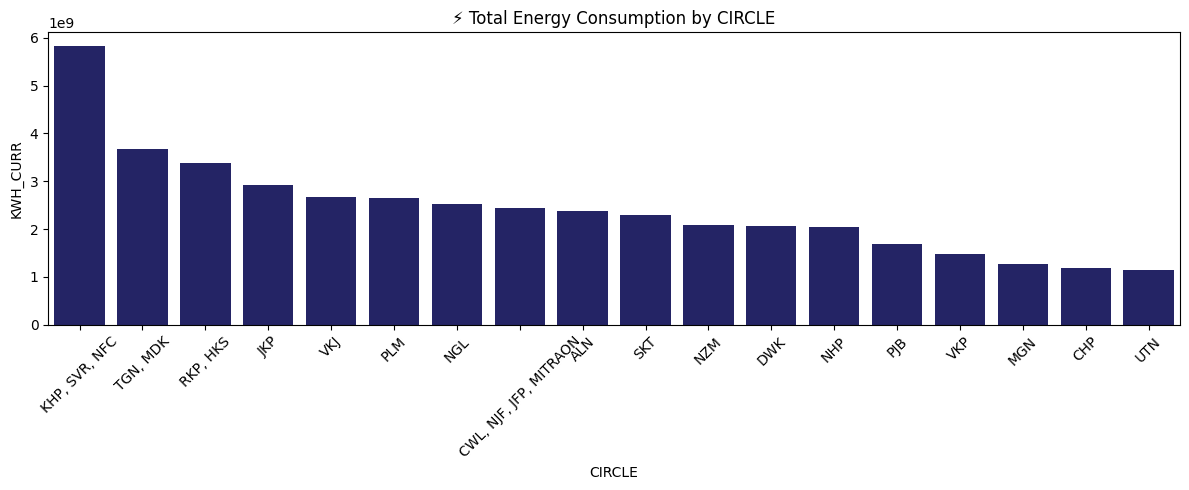

In [29]:
circle_energy = df.groupby('CIRCLE')['KWH_CURR'].sum().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12,5))
sns.barplot(data = circle_energy, x = 'CIRCLE', y = 'KWH_CURR',color = 'midnightblue')
plt.title("⚡ Total Energy Consumption by CIRCLE")
plt.xlabel('CIRCLE')
plt.ylabel('KWH_CURR')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

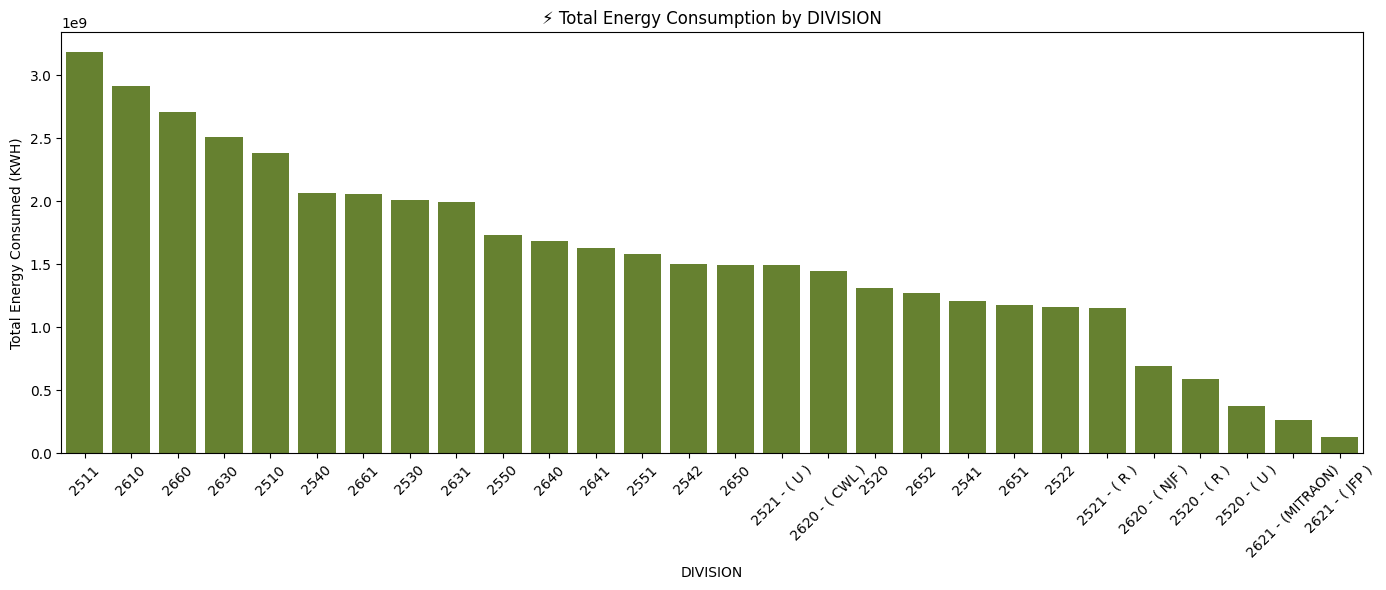

In [30]:
division_energy = df.groupby('DIVISION')['KWH_CURR'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=division_energy, x='DIVISION', y='KWH_CURR', color='olivedrab')  # Top 15 for readability
plt.title('⚡ Total Energy Consumption by DIVISION')
plt.xlabel('DIVISION')
plt.ylabel('Total Energy Consumed (KWH)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📍 Insight
🔝 The highest energy consumption was observed in the KHP, SVR, NFC circle with a massive 5.82 billion kWh, followed by TGN, MDK and RKP, HKS.

⚙️ In terms of DIVISIONS, 2511 topped the list with 3.18 billion kWh, indicating it as a high-demand zone.

⚡ This suggests these areas either have higher population density, industrial presence, or greater infrastructure usage leading to heavy electricity consumption.

<h3 style = "color:yellow">7) Compare 1PH vs 3PH meters – which has higher power cut duration?</h3>

In [31]:
# df.head()
df['TYPE'].value_counts()

TYPE
WC      3240
1PH     3228
LT      3216
Name: count, dtype: int64

In [32]:
df['TYPE'] = df['TYPE'].str.strip()
Meter_Type = df.groupby('TYPE')['POWEROFF_CURR'].mean().reset_index()
Meter_Type

,TYPE,POWEROFF_CURR
0,1PH,5.915539
1,LT,5.100762
2,WC,6.180559


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\3220402524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Meter_Type, x = 'TYPE' , y = 'POWEROFF_CURR', palette= 'pastel')


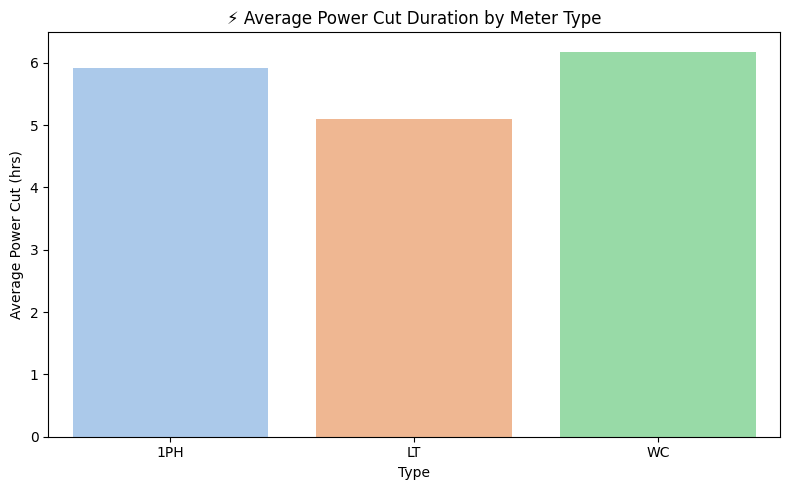

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data = Meter_Type, x = 'TYPE' , y = 'POWEROFF_CURR', palette= 'pastel')
plt.title("⚡ Average Power Cut Duration by Meter Type")
plt.xlabel('Type')
plt.ylabel("Average Power Cut (hrs)")
plt.tight_layout()
plt.show()

### ⚖️ Insight: Power Cut Duration by Meter Type

Based on average power cut durations:

- **WC (Whole Current)** meters experience the **highest average cuts**: `6.18 hrs`
- **1PH (Single Phase)** meters face moderate cuts: `5.91 hrs`
- **LT (Low Tension)** meters have the **least average** power cuts: `5.10 hrs`

🧠 **Reasoning**: LT meters are used in high-load commercial setups which might receive better power infrastructure and priority, while WC and 1PH meters (used in residential or small businesses) may face longer cuts due to overload or lower priority in restoration.


<h3 style = "color:yellow">8) Is there a correlation between meter type and energy consumption?</h3>

In [34]:
df['TYPE'] = df['TYPE'].str.strip()
Meter_Type = df.groupby('TYPE')['KWH_CURR'].sum().reset_index()
Meter_Type

,TYPE,KWH_CURR
0,1PH,2.934779e+10
1,LT,4.681805e+09
2,WC,9.680858e+09


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\3544279074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Meter_Type, x='TYPE', y='KWH_CURR', palette='plasma')


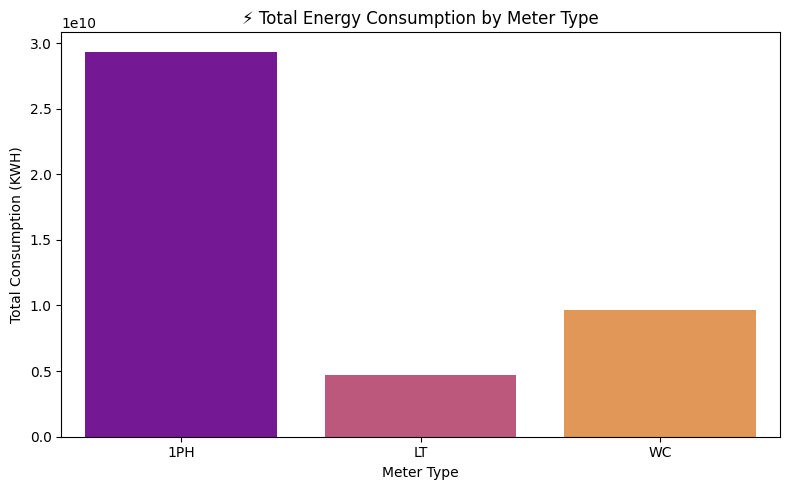

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data=Meter_Type, x='TYPE', y='KWH_CURR', palette='plasma')
plt.title("⚡ Total Energy Consumption by Meter Type")
plt.xlabel("Meter Type")
plt.ylabel("Total Consumption (KWH)")
plt.tight_layout()
plt.show()


### 📊 Insight – Correlation Between Meter Type and Energy Consumption

The analysis shows that:

- **1PH meters** consume the highest energy (≈ 29.34 Billion KWH), suggesting they're the most widely used type.
- **WC meters** (part of 3-phase category) come second (≈ 9.68 Billion KWH), typically used in commercial/industrial setups.
- **LT meters** have the lowest consumption (≈ 4.68 Billion KWH), often used in small-load areas.

This suggests a **strong correlation** between **meter type and total energy usage**, reflecting **consumer category and load profile**.


<h3 style = "color:yellow">9) Is there a correlation between power cuts (POWEROFF_CURR) and energy consumption (KWH_CURR)?</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\1037750515.py:7: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


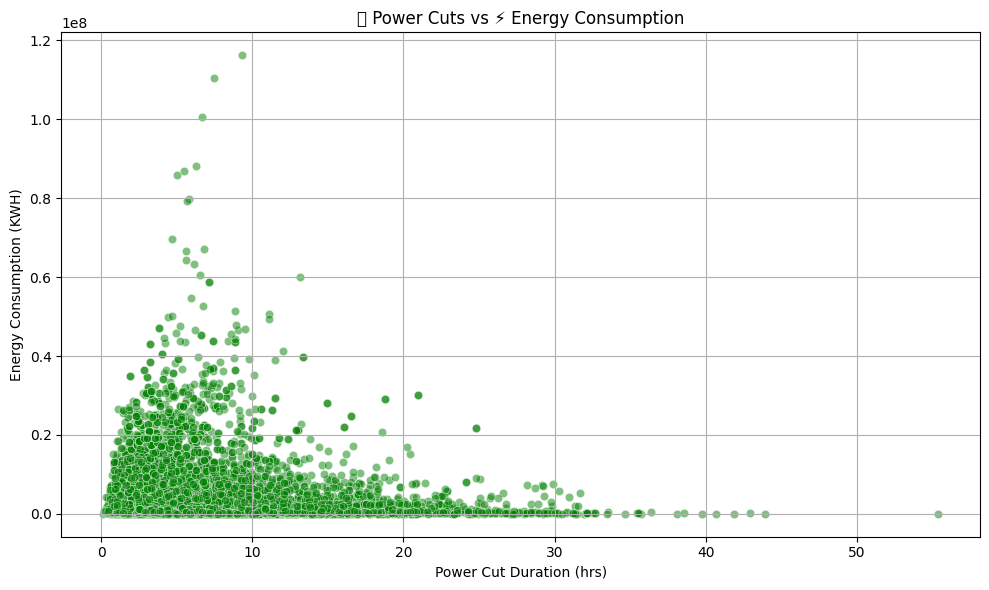

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='POWEROFF_CURR', y='KWH_CURR', alpha=0.5, color='green')
plt.title("🔌 Power Cuts vs ⚡ Energy Consumption")
plt.xlabel("Power Cut Duration (hrs)")
plt.ylabel("Energy Consumption (KWH)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
correlation = df['POWEROFF_CURR'].corr(df['KWH_CURR'])
print(f"📈 Pearson Correlation: {correlation:.3f}")


📈 Pearson Correlation: -0.051


### 📊 Insight:

The Pearson correlation coefficient between power cut duration and energy consumption is -0.051, indicating a very weak negative correlation.

This suggests that areas with higher energy consumption tend to experience slightly fewer power cuts. It could imply that high-demand regions (such as commercial or industrial zones) receive more reliable power supply, possibly due to infrastructure prioritization or better load management.

<h3 style = "color:yellow">10) Does a higher number of engineers (ESO_CURR) result in lower power cuts?</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\3311345177.py:8: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\3311345177.py:8: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128119 (\N{CONSTRUCTION WORKER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


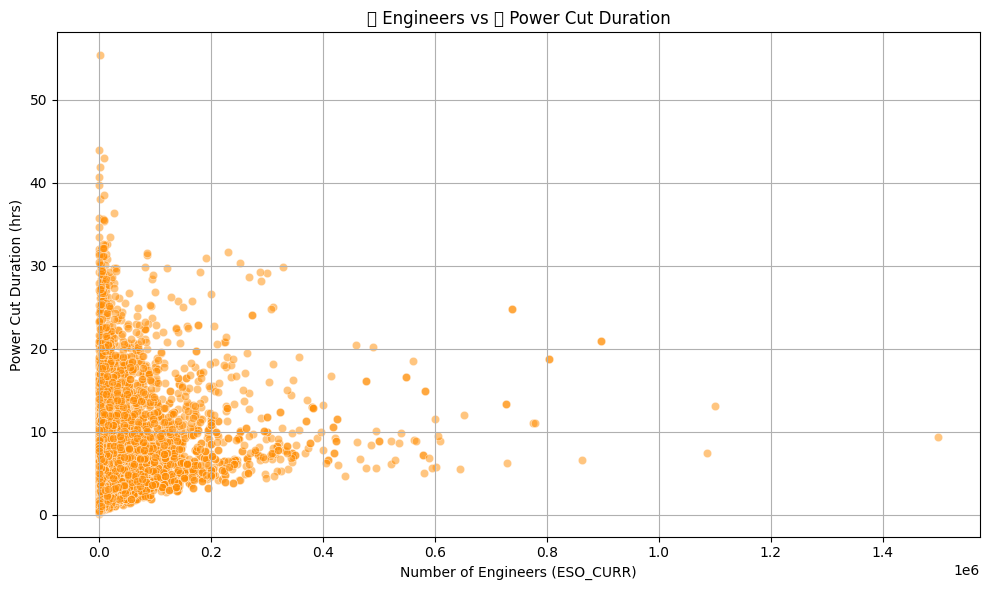

🔁 Pearson Correlation between ESO_CURR and POWEROFF_CURR: 0.225


In [38]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ESO_CURR', y='POWEROFF_CURR', alpha=0.5, color='darkorange')
plt.title("👷 Engineers vs 🔌 Power Cut Duration")
plt.xlabel("Number of Engineers (ESO_CURR)")
plt.ylabel("Power Cut Duration (hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation coefficient
corr = df['ESO_CURR'].corr(df['POWEROFF_CURR'])
print("🔁 Pearson Correlation between ESO_CURR and POWEROFF_CURR:", round(corr, 3))


#### ✅ Conclusion:
While we expected a negative correlation (more engineers = fewer power cuts), the weak positive correlation highlights that mere number of engineers may not reduce outages. A deeper analysis with more features (like fault type, infra condition, etc.) may be needed.

<h3 style = "color:yellow">11) What’s the average PER_CHANGE in power cuts per division?</h3>

In [39]:
df.head()

,MONTH,TYPE,CIRCLE,DIVISION,POWEROFF_CURR,KWH_CURR,ESO_CURR,PER_CHANGE,SEASON
0,2024-02-01,WC,"CWL, NJF, JFP, MITRAON",2621 - (MITRAON),16.57,375148.0,7553.0,4.21,Winter
1,2024-02-01,WC,DWK,2661,2.00,2393594.0,8334.0,-48.32,Winter
2,2024-02-01,WC,JKP,2610,2.24,6955959.0,22258.0,-26.56,Winter
3,2024-02-01,WC,"KHP, SVR, NFC",2511,4.21,1174879.0,7763.0,23.46,Winter
4,2024-02-01,WC,"KHP, SVR, NFC",2541,3.78,1285470.0,6709.0,-30.77,Winter


In [40]:
# Calculate average PER_CHANGE by DIVISION
avg_per_change = df.groupby('DIVISION')['PER_CHANGE'].mean().reset_index()
avg_per_change = avg_per_change.sort_values(by='PER_CHANGE', ascending=False)
avg_per_change

,DIVISION,PER_CHANGE
24,2651,30.320000
2,2520,22.084965
25,2652,18.632704
13,2551,18.169584
1,2511,16.357705
0,2510,15.075783
9,2540,13.117645
23,2650,12.210977
19,2630,10.634591
22,2641,10.267355


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10264\3675684990.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


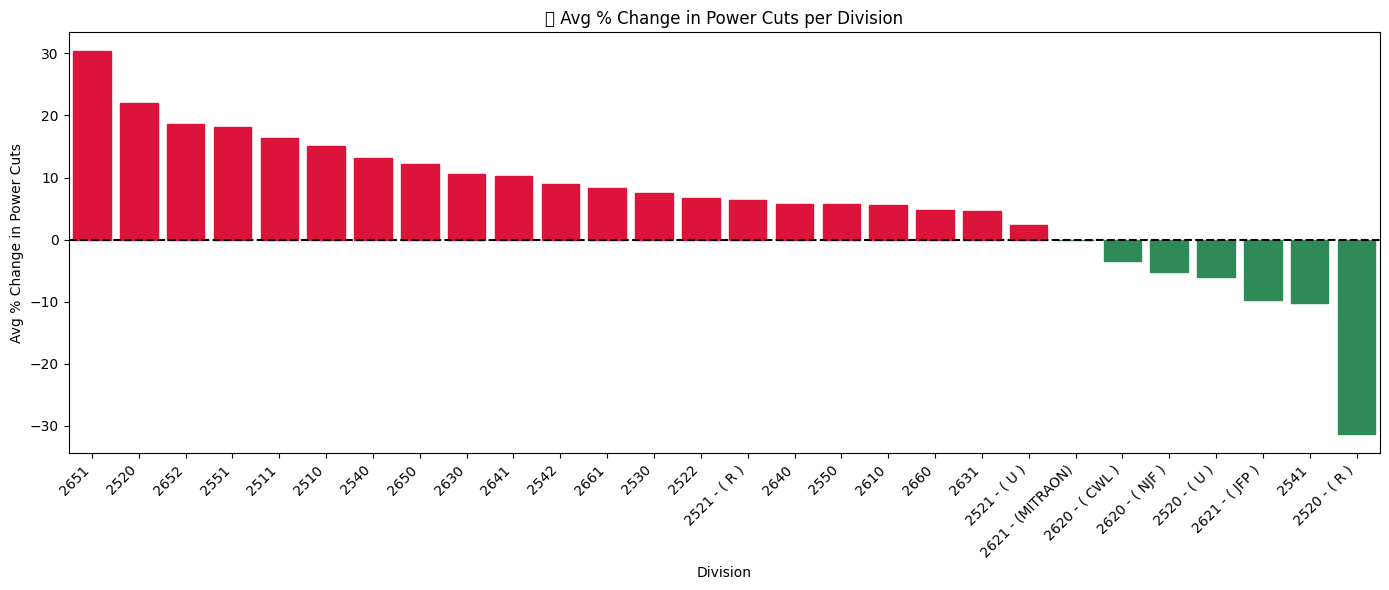

In [41]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Plot without custom palette
bars = sns.barplot(
    data=avg_per_change,
    x='DIVISION',
    y='PER_CHANGE',
    color='gray'
)

# Apply custom colors based on value
for index, bar in enumerate(bars.patches):
    value = avg_per_change['PER_CHANGE'].iloc[index]
    bar.set_color('crimson' if value > 0 else 'seagreen')

# Horizontal line at 0
plt.axhline(0, color='black', linestyle='--')

plt.title("📊 Avg % Change in Power Cuts per Division")
plt.xlabel("Division")
plt.ylabel("Avg % Change in Power Cuts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🔍 Insight: Division-wise Change in Power Cuts (%PER_CHANGE)
A majority of divisions show positive PER_CHANGE, indicating a reduction in power cuts and improved electricity supply over time.

#### ✅ Top Improving Divisions:

2651, 2520, 2652, 2551, and 2511 have shown significant positive growth, with PER_CHANGE ranging from +15% to +30%, suggesting better infrastructure or effective management.

#### ❌ Declining Divisions:

2520 - (R), 2541, 2621 - (JFP), and 2520 - (U) show negative PER_CHANGE, indicating increased power cuts. These regions may need targeted action or audits to identify and resolve operational issues.



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9684 entries, 0 to 9755
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MONTH          9684 non-null   datetime64[ns]
 1   TYPE           9684 non-null   object        
 2   CIRCLE         9684 non-null   object        
 3   DIVISION       9684 non-null   object        
 4   POWEROFF_CURR  9684 non-null   float64       
 5   KWH_CURR       9684 non-null   float64       
 6   ESO_CURR       9684 non-null   float64       
 7   PER_CHANGE     9684 non-null   float64       
 8   SEASON         9684 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 756.6+ KB


## ✅ Final Conclusion:

- The analysis of power cut patterns, energy consumption, meter types, and operational factors across various divisions and circles offers several valuable insights:

#### Seasonality Plays a Key Role:
- Power cuts peak during summer and monsoon months (May–August), with June 2024 being the worst-hit.
- Winter months (especially February) experience minimal outages.

#### Location-Wise Performance Varies:
- Certain circles like CWL, NJF, JFP, MITRAON and divisions such as 2651 and 2520 show significantly high power cuts, highlighting zones for urgent improvement.
- On the other hand, divisions like 2520 (R) show strong positive change.

#### Meter Types Reflect Usage Patterns:
- 1PH meters (residential) consume the most power but have moderate outage duration.
- WC meters (3-phase) suffer the highest outages.
- LT meters (used in commercial setups) show the lowest power cuts, possibly due to priority treatment.

#### Correlations Are Weak or Mixed:
- There's no strong correlation between power cuts and energy consumption or ESO count.
- Infrastructure quality, fault types, and demand may be more decisive than headcount.

## 📌 Recommendations:

>🌞 Seasonal Preparedness: Proactively strengthen grid infrastructure before summer and monsoon seasons.

>🛠️ Division-Specific Action Plans: Prioritize high-outage areas like 2651, 2520, 2541 for infrastructure upgrades and auditing.

>🧪 Advanced Monitoring: Include more variables like fault duration, maintenance frequency, or transformer load to build a predictive model.

>👨‍🔧 Engineer Efficiency Over Quantity: Focus on engineer skillset, responsiveness, and tools rather than just increasing manpower.

